# Introduction to Deep Learning

This notebook contains code samples that go along with the the "Introduction to Deep Learning" tech talk by the Flatiron School.  

This notebook contains example code on how to build a basic neural network for classification of handwritten digits from the MNIST data set.  

## Step 1: Import and Preprocess the Data

We'll begin by importing the data set we'll be working with during this demo--the [MNIST data set](http://yann.lecun.com/exdb/mnist/).  

This data set is often referred to as the "Hello, World!" of Deep Learning, so the data set is already embedded within Keras, the framework we'll be using during this demonstration. 

Run the cell below to import the dataset from Keras.

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


Now, run the cell below to import the images we'll be working with, along with their corresponding labels. If this is the first time you have ever run this command on your computer, it will download these from the internet.  This download may take a little while--be patient!

Note that the `load_data()` function returns the data and labels in a format this is already split into training and testing sets.  

We use a **_Testing Set_** to ensure that our machine learning models can do well on data that it hasn't seen before. If we just blindly trust the performance metrics from the training set, we can't be sure that the model isn't **_overfitting_** to our training data by just memorizing the labels, rather than learning the important things that help it actually learn to classify as we want it to.  

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Now, we'll need to import some other tools in order to complete this lab.  Run the cell below to import everything we'll need for this lab.  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense

**_Note:_** If you get an error running the cell above, it is likely because you don't have keras and/or tensorflow properly installed on your machine.  To fix this, uncomment and run the code in the cell below.  Only do this if you get an import error telling you that it can't find a module named `keras` or `tensorflow`.

Once the cell below has run and completed the installation, rerun the cell above containing all the import statements to double check that everything has worked. 

In [4]:
# !pip install keras

## Preprocessing Our Image Data

The MNIST dataset consists of 70,000 labeled images of handwritten digits 0 - 9 (60,000 in training, and 10,000 in testing).  These images are greyscale (black and white images), and 28 x 28 pixels.  

Our model will treat each unique pixel position as a separate feature, and learn to correctly predict the class of each number based on the pixel values in the image.  

Right now, our images are in the form of a 28 x 28 matrix--an array that contains 28 arrays, that each contain 28 separate pixel values. 

Let's examine a sample image and it's corresponding label to get a feel for what our data actually looks like. 

Run the cell below to examine the first image in the dataset, along with its label.  

Label: 5


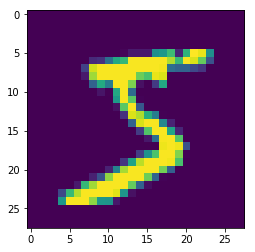

In [5]:
plt.imshow(X_train[0])
print("Label: {}".format(y_train[0]))

In order for our neural network to work with this data, we'll need to **_reshape_** the images from a 2-dimensional **_matrix_** to a 1-dimensional **_vector_**.  We can do this by converting our data from 28 different arrays of 28 items each into one giant array of 784 items (28 x 28 = 784). 

Note that we'll leave the first dimension alone, because that keeps all the images separate--we want to reshape all the pixels in a given image into a vector, but we don't want to combine images, as that wouldn't be helpful.

Run the cell below to reshape our data using numpy.

In [6]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

We'll also want to **_normalize_** our data.  This is a common step in machine learning, as it lets our model focus on the relative differences for each given feature.  By rescaling our data from between 0 and 255 to a value between 0 and 1, we decrease the amount of time it takes for the model to learn the information necessary for accurate classifications. 

Since we are dealing with image data, this means all values are bounded between 0 and 255.  This allows to utilize a quick hack to rescale our data by just dividing by 255.

Run the cell below to normalize our data. 

In [7]:
X_train /= 255.
X_test /= 255.

For the final step of preprocessing, we need to convert our labels from integers to **_one-hot encoded vectors_**.

For the example image above, our the label is currently represented as the integer `5`.

After one-hot encoding, the label will be a vector with 10 elements, with every element being a `0` except for the the index corresponding to the image's true class:

<center>`[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]` <br>
**_One-Hot Encoded Representation of the label '5'_**</center>

Keras provides helper function to easily change our label encoded from integer-based to one-hot encoded.  Run the cell below to convert our labels to a one-hot encoded format. 

In [8]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Let's examine the label for the first item again to confirm that the one-hot encoding looks the way we expect.  

In [9]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

Great! Now we can begin building our model.

## Building our First Deep Neural Network

In this lecture, we'll be building a **_Feed-Forward Neural Network_**.  This means:

* The network contains an **_Input Layer_**, at least 1 **_Hidden Layer_**, and an **_Output Layer_**.
* All neurons in a given layer receive input from every neuron in the previous layer.
* All neurons in a given layer pass their output on as input to every neuron in the following layer. 
* Each neuron has a unique **_weight_** value for every input it receives from the previous layer, denoting how important it thinks that input is.  This can be any number between negative infinity and positive infinity.  

<img src='nn_diagram.svg'>

The tech talk that corresponds with this notebook will cover the basic idea behind forward propagation, back propagation, and how the neural network learns the appropriate all the appropriate weight values to maximize its ability to correctly classify the data.  

Run the cell below to build a basic neural network.

In [10]:
model = Sequential()
model.add(Dense(250, activation='relu', input_shape=(784,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

Now that we have described the specifics of the model using Keras's API, we need to **_compile_** the model.  In this step, Keras will write the underlying TensorFlow code to actually construct the model we just specified.  

Run the cell below to compile the model.

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Before we begin training the model, let's take a quick look at a summary of the model. 

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 226,910
Trainable params: 226,910
Non-trainable params: 0
_________________________________________________________________


Our model has over 226,000 trainable parameters! This is huge by traditional machine learning standards, but this is actually quite small compared to many Deep Learning models used in production nowadays. 

Run the cell below to train our model and see how well it does on both our training set and our testing set.  

In [13]:
results = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.2231 - acc: 0.9324 - val_loss: 0.1002 - val_acc: 0.9675
Epoch 2/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0950 - acc: 0.9700 - val_loss: 0.0866 - val_acc: 0.9738
Epoch 3/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0665 - acc: 0.9791 - val_loss: 0.0902 - val_acc: 0.9722
Epoch 4/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0508 - acc: 0.9838 - val_loss: 0.0736 - val_acc: 0.9777
Epoch 5/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0403 - acc: 0.9869 - val_loss: 0.0751 - val_acc: 0.9791
Epoch 6/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0341 - acc: 0.9893 - val_loss: 0.0859 - val_acc: 0.9770
Epoch 7/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0302 - acc: 0.9900 - val_loss: 0.0828 - 

## Evaluating Our Results

The model just gave us a ton of information--but what does it all mean?

An **_Epoch_** is one time through the entire training set.  With 10 epochs, that means our model learned by getting 10 rounds of practice on the training set.  

The **_Loss_** represents our total combined error in an epoch.  

**_Accuracy_** represents the pecentage of correct classifications our model was able to make on the data.  

**_Validation Loss_** and **_Validation Accuracy_** are the loss and validation scores for our model's performance on the **_Testing Set_** we created.  These are the numbers that are most important--we care about how well our model does on data it hasn't seen before.  

When we fit a model, it automatically returns a python **_dictionary_** containing a record of loss, accuracy, val_loss, and val_acc scores at every epoch.  This makes it easy to visualize.  

Run the cell below to create a visualization of our model's training and testing loss/accuracy.

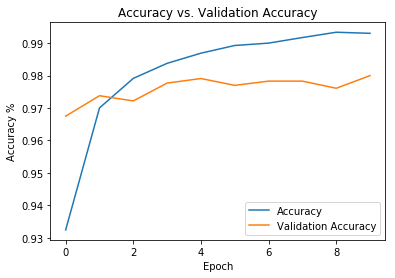

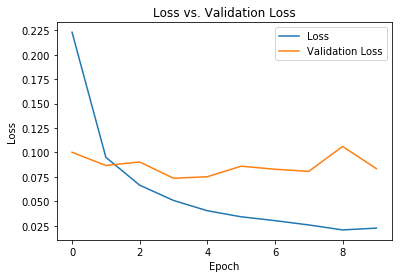

In [19]:
history = results.history
plt.figure()
plt.plot(history['acc'])
plt.plot(history['val_acc'])

plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy vs. Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.show()


plt.figure()
plt.plot(history['loss'])
plt.plot(history['val_loss'])

plt.legend(["Loss", "Validation Loss"])
plt.title("Loss vs. Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Conclusion

**_GREAT JOB_**--you just built and trained your first neural network, which was able to classify handwritten digits with 98% accuracy!